<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="chisq"></a>
# 2. Chi-Square Test

It is a non-parametric test. `Non-parametric tests` do not require any assumptions on the parameter of the population from which the sample is taken. These tests can be applied to the ordinal/ nominal data. A non-parametric test can be performed on the data containing outliers.

The chi-square test statistic follows a Chi-square ($\chi^{2}$) distribution under the null hypothesis. It can be used to check the relationship between the categorical variables. 

Let us calculate the right-tailed $\chi^{2}$ values for different levels of significance ($\alpha$).

<a id="goodness"></a>
## 2.1 Chi-Square Test for Goodness of Fit

This test is used to compare the distribution of the categorical data with the expected distribution. 

<p style='text-indent:6em'> <strong> $H_{0}$: There is no significant difference between the observed and expected frequencies from the expected distribution</strong></p>
<p style='text-indent:6em'> <strong> $H_{1}$: There is a significant difference between the observed and expected frequencies from the expected distribution</strong></p>

### Example:



#### 1. At an emporium, the manager is interested in knowing the age group which visits the mall during the day. He defines categories as - children, teenagers, adults and senior citizens. He plans to have his inventory of goods accordingly. He claims that out of all the people who visited 5% are children, 38% are teenagers, 2% are senior citizens are remaining are adults. From a sample of 180 people, it was seen that 25 were children, 50 were teenagers, 90 were adults and  15 were senior citizens. Test the manager’s claim at a 95% confidence level.


In [5]:
n=180
exp_per =np.array([0.05,0.38,0.55,0.02])
exp_count = exp_per*n
obs_count=[25,50,90,15]
print(exp_count)
print(obs_count)

[ 9.  68.4 99.   3.6]
[25, 50, 90, 15]


In [8]:
# Ho : obs=exp
# Ha : obs != exp

In [9]:
tstat,pval = stats.chisquare(f_exp=exp_count,f_obs=obs_count)
print('Test stat:',tstat)
print('Pval:',pval)

Test stat: 70.31233386496544
Pval: 3.659118590746896e-15


In [10]:
# pval = 0
# sig lvl = 0.05
# pval < sig lvl
# Ho is rejected. Ha is selected
# obs != exp

### Practice:

1) In a school, sports teacher is willing to see the proportion of
people participating in different sports. He expects that all the sports
are equal in proportion. After the observation, he found that

cricket - 35%
volley ball - 25%
foot ball - 20%
basket ball - 20%

Total number of student in the school - 200

Check the hypotheis with 95% Confidence level.

<a id="ind"></a>
## 2.2 Chi-Square Test for Independence

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

Consider a categorical variable `A` with `r` levels and variable `B` with `c` levels. Let us test the independence of variables A and B.

The test statistic is given as:
<p style='text-indent:25em'> <strong> $\chi^{2} = \sum_{i= 1}^{r}\sum_{j = 1}^{c}\frac{O_{ij}^{2}}{E_{ij}} - N$</strong></p>

Where, <br>
$O_{ij}$: Observed frequency for category (i,j) <br>
$E_{ij}$: Expected frequency for category (i,j)<br>
$N$: Total number of observations

Under $H_{0}$, the test statistic follows a chi-square distribution with $(r-1)(c-1)$ degrees of freedom.

In [20]:
obs = pd.DataFrame([[3,1],[2,2]],columns=['Yes','No'],index=['Male','Female'])
obs

,Yes,No
Male,3,1
Female,2,2


In [21]:
tstat,pval,dof,exp_tab = stats.chi2_contingency(obs,correction=True)
print('Test stat:',tstat)
print('pval:',pval)
print('Degrees of freedom:',dof)
print('Expected table:',exp_tab)

Test stat: 0.0
pval: 1.0
Degrees of freedom: 1
Expected table: [[2.5 1.5]
 [2.5 1.5]]


### Example:

#### 1. Check if there is any relationship between the gender and education level of students with 95% confidence. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [22]:
df = pd.read_csv('students_data.csv')
df.head()

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning
2,female,group B,master's degree,standard,none,64,71,56,191,Nature Learning
3,male,group A,associate's degree,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,college,standard,none,75,66,51,192,Nature Learning


In [ ]:
# Ho : There is no relation b/w gender and education(Independant)
# Ha : There is a relation b/w gender and education(Not independant)

In [25]:
obs  = pd.crosstab(df['gender'],df['education'])
obs

education,Ph.D.,associate's degree,bachelor's degree,college,high school,master's degree
gender,,,,,,
female,91,116,63,117,94,36
male,88,106,55,108,103,23


In [27]:
tstat,pval,dof,exp_tab = stats.chi2_contingency(obs,correction=False)
print('Test stat:',tstat)
print('pval:',pval)
print('Degrees of freedom:',dof)
print('Expected table:',exp_tab)

Test stat: 3.5267538812534243
pval: 0.6193433487137843
Degrees of freedom: 5
Expected table: [[ 92.543 114.774  61.006 116.325 101.849  30.503]
 [ 86.457 107.226  56.994 108.675  95.151  28.497]]


In [ ]:
# pval = 0.6
# sig lvl = 0.05
# pval> sig lvl
# Ho is accepted
# There is no relation

###  Practice:

**Check the relation of gender and lunch with 95%CI.**

<a id="1way"></a>
# 3. One-way ANOVA

It is used to check the equality of population means for more than two independent samples. Each group is considered as a `treatment`. It assumes that the samples are taken from normally distributed populations. To check this assumption we can use the `Shapiro-Wilk Test.` Also, the population variances should be equal; this can be tested using the `Levene's Test`.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>

Consider there are `t` treatments and `N` number of total observations. The test statistic is given as:
<p style='text-indent:28em'> <strong> $F = \frac{MTrSS}{MESS} $</strong></p>

Where,<br>
MTrSS = $\frac{TrSS}{df_{Tr}}$<br>

TrSS = $\sum_{i}^{t}\sum_{j}^{n_{i}}n_{i}(\bar{x_{i}}. - \bar{x}..)$<br> $n_{i}$ is the number of observations in $i^{th}$ treatment. <br>$\bar{x_{i}}.$ is the mean over $i^{th}$ treatment <br> $\bar{x}..$ is the grand mean (i.e. mean of all the observations). <br>

$df_{Tr}$ is the degrees of freedom for treatments (= $t-1$)

MESS = $\frac{ESS}{df_{e}}$<br>

ESS = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$

$df_{e}$ is the degrees of freedom for error (= $N-t$)

Under $H_{0}$, the test statistic follows F-distribution with ($t-1,  N-t$) degrees of freedom.

Let us calculate the F values for different levels of significance ($\alpha$).

### Example:

#### 1. Total marks in aptitude exam are recorded for students with different race/ethnicity. Test whether all the races/ethnicities have an equal average score with 0.05 level of significance. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [34]:
# read the students performance data 
df = pd.read_csv('students_data.csv')

# display the first two observations
df.head(5)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning
2,female,group B,master's degree,standard,none,64,71,56,191,Nature Learning
3,male,group A,associate's degree,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,college,standard,none,75,66,51,192,Nature Learning


In [31]:
df['ethnicity'].value_counts()

group C    319
group D    261
group B    190
group E    140
group A     90
Name: ethnicity, dtype: int64

In [32]:
grp_a = df[df['ethnicity']=='group A']['total_score']
grp_b = df[df['ethnicity']=='group B']['total_score']
grp_c = df[df['ethnicity']=='group C']['total_score']
grp_d = df[df['ethnicity']=='group D']['total_score']
grp_e = df[df['ethnicity']=='group E']['total_score']

In [36]:
# Test of normality
print(shapiro(grp_a))
print(shapiro(grp_b))
print(shapiro(grp_c))
print(shapiro(grp_d))
print(shapiro(grp_e))

ShapiroResult(statistic=0.9894436001777649, pvalue=0.6901752352714539)
ShapiroResult(statistic=0.9947066307067871, pvalue=0.7402700185775757)
ShapiroResult(statistic=0.9973903298377991, pvalue=0.8950209617614746)
ShapiroResult(statistic=0.9948431253433228, pvalue=0.5269628167152405)
ShapiroResult(statistic=0.991719126701355, pvalue=0.5859840512275696)


In [ ]:
# pval>0.05
# All data are normal

In [37]:
# equality of variance
# Ho : all variance are equal
# Ha : atleast one variance is not equal
stats.levene(grp_a,grp_b,grp_c,grp_d,grp_e)

LeveneResult(statistic=1.8006030590828939, pvalue=0.12649444001357793)

In [ ]:
# pval > 0.05
# All the variance are equal

In [ ]:
# Both the assumptions of anova are satisfied

In [38]:
# Ho : All mean are equal
# Ha : Atleast one mean is  not equal

In [39]:
stats.f_oneway(grp_a,grp_b,grp_c,grp_d,grp_e)

F_onewayResult(statistic=0.789109595922189, pvalue=0.5322937031083035)

In [40]:
# pval =0.53
# sig lvl = 0.05
# pval > sig lvl
# Ho is selected
# All means are equal

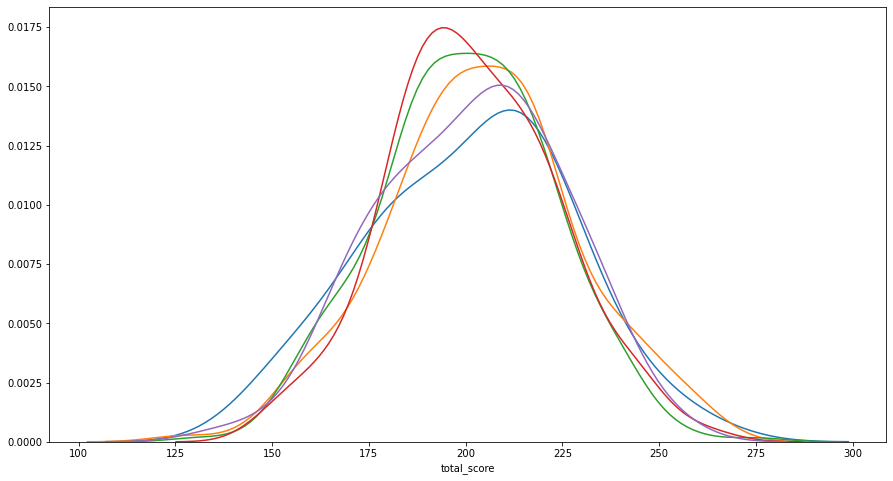

In [42]:
sns.distplot(grp_a,hist=False)
sns.distplot(grp_b,hist=False)
sns.distplot(grp_c,hist=False)
sns.distplot(grp_d,hist=False)
sns.distplot(grp_e,hist=False)
plt.show()

#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Test at 5% level of significance.

<img src='1_ANOVA.png'>

### Example:

#### 1. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Perform the post-hoc test to find out which machine has a different average. Test at 5% level of significance.

<img src='1_ANOVA.png'>

In [43]:
machine_a = [68.7,75.4,70.9,79.1,78.2]
machine_b = [62.7,68.5,63.1,62.2,60.3]
machine_c = [55.9,56.1,57.3,59.2,50.1]
machine_d = [80.7,70.3,80.9,85.4,82.3]

In [44]:
# Test of normality
print(shapiro(machine_a))
print(shapiro(machine_b))
print(shapiro(machine_c))
print(shapiro(machine_d))


ShapiroResult(statistic=0.9147661328315735, pvalue=0.4967544972896576)
ShapiroResult(statistic=0.8534730076789856, pvalue=0.2057477980852127)
ShapiroResult(statistic=0.8795409202575684, pvalue=0.3072359263896942)
ShapiroResult(statistic=0.8367964029312134, pvalue=0.15625961124897003)


In [ ]:
# pval>0.05
# All data are normal

In [45]:
# equality of variance
# Ho : all variance are equal
# Ha : atleast one variance is not equal
stats.levene(machine_a,machine_b,machine_c,machine_d)

LeveneResult(statistic=0.3969333650936478, pvalue=0.7570021212992085)

In [ ]:
# pval > 0.05
# All the variance are equal

In [ ]:
# Both the assumptions of anova are satisfied

In [38]:
# Ho : All mean are equal
# Ha : Atleast one mean is  not equal

In [46]:
stats.f_oneway(machine_a,machine_b,machine_c,machine_d)

F_onewayResult(statistic=32.03072350199285, pvalue=5.375613532781072e-07)

In [40]:
# pval =0
# sig lvl = 0.05
# pval < sig lvl
# Ho is rejected
# Atleast one means is different

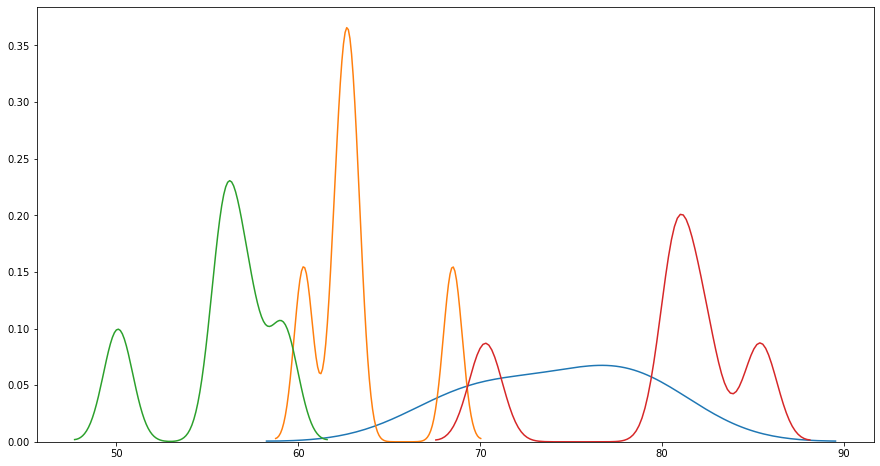

In [54]:
sns.kdeplot(machine_a)
sns.kdeplot(machine_b)
sns.kdeplot(machine_c)
sns.kdeplot(machine_d)
plt.show()

In [55]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame({'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                           'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [56]:
df_machine

,machine,strength
0,machine_A,68.7
1,machine_B,62.7
2,machine_C,55.9
3,machine_D,80.7
4,machine_A,75.4
5,machine_B,68.5
6,machine_C,56.1
7,machine_D,70.3
8,machine_A,70.9
9,machine_B,63.1


In [60]:
import statsmodels.stats.multicomp as mc
mc = mc.MultiComparison(df_machine['strength'],groups=df_machine['machine'])
post_hoc = mc.tukeyhsd(alpha=0.05)
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
machine_A,machine_B,-11.1,0.0044,-18.8842,-3.3158,True
machine_A,machine_C,-18.74,0.001,-26.5242,-10.9558,True
machine_A,machine_D,5.46,0.2265,-2.3242,13.2442,False
machine_B,machine_C,-7.64,0.0553,-15.4242,0.1442,False
machine_B,machine_D,16.56,0.001,8.7758,24.3442,True
machine_C,machine_D,24.2,0.001,16.4158,31.9842,True


<a id="non-para"></a>
# 4. Equivalent Non-parametric Test

If one of the assumptions of one-way ANOVA is not satisfied, then we can perform the `Kruskal-Wallis H test` which is a non-parametric equivalent test for one-way ANOVA.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>

Consider there are `t` treatments each with $n_{i}$ (i = 1,2,...,t) observations  and `n` be the number of total observations. The test statistic is given as:
<p style='text-indent:28em'> <strong> $H = \frac{12}{n(n+1)} \sum_{i}{\frac{R_{i}^{2}}{n_{i}} - 3(n+1)} $</strong></p>

Where $R_{i}$ sum of the ranks of observations in the $i^{th}$ treatment.

Under $H_{0}$, the test statistic follows Chi-square distribution with ($t-1$) degrees of freedom.

### Example:

#### 1. A gym trainer wants to provide an energy bar to all his customers to increase muscle strength. Three different companies approached the gym trainer with their high-quality energy bars. The trainer collects an amount of calcium (in g) in the energy bar from three companies and he wants to study whether all the bars have an equal amount of calcium on average. Test at 5% level of significance.

given data:
           
           alpha_bar = [24.4, 20.7, 56.9, 19.5]
           beta_bar = [53.2, 54.7, 20.5, 15.8, 56.6]
           gamma_bar = [54, 31, 22.8, 24.7]

In [61]:
alpha_bar = [24.4, 20.7, 56.9, 19.5]
beta_bar = [53.2, 54.7, 20.5, 15.8, 56.6]
gamma_bar = [54, 31, 22.8, 24.7]

In [62]:
# Test of normality
print(shapiro(alpha_bar))
print(shapiro(beta_bar))
print(shapiro(gamma_bar))



ShapiroResult(statistic=0.7282745838165283, pvalue=0.023655038326978683)
ShapiroResult(statistic=0.7668079137802124, pvalue=0.04227732494473457)
ShapiroResult(statistic=0.8186634182929993, pvalue=0.14012180268764496)


In [ ]:
# pval<0.05
# Data is not normal

In [ ]:
#  assumptions of anova are not satisfied

In [63]:
# Ho : All median are equal
# Ha : Atleast one median is  not equal

In [64]:
stats.kruskal(alpha_bar,beta_bar,gamma_bar)

KruskalResult(statistic=0.22747252747252844, pvalue=0.8924933076960211)

In [40]:
# pval =0.89
# sig lvl = 0.05
# pval > sig lvl
# Ho is selected
# All median are equal

#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 3 machines - A, B and C. Ryan want to study whether all the machines have equal efficiency. There no information about the tensile strength of the population. Can it be said that the machines produce the sample tensile strength? Test at 5% level of significance.

<img src='KW_test.png'>

# Relation in  Datasets

In [52]:
df = pd.read_csv('students_data.csv')
df.head()

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning
2,female,group B,master's degree,standard,none,64,71,56,191,Nature Learning
3,male,group A,associate's degree,free/reduced,none,60,99,72,231,Nature Learning
4,male,group C,college,standard,none,75,66,51,192,Nature Learning


### Is gender related to total score?

In [65]:
male_ts = df[df['gender']=='male']['total_score']
female_ts = df[df['gender']=='female']['total_score']

In [66]:
stats.shapiro(male_ts)

ShapiroResult(statistic=0.9968342185020447, pvalue=0.46959948539733887)

In [67]:
stats.shapiro(female_ts)

ShapiroResult(statistic=0.9980188608169556, pvalue=0.8171048164367676)

In [ ]:
# Data are normal

In [ ]:
# Ho : mu1 = mu2 (no relation)
# Ha : mu1 != mu (relation)

In [68]:
# Data are normal
# pop std is not known

In [69]:
stats.ttest_ind(male_ts,female_ts)

Ttest_indResult(statistic=0.2743736370567049, pvalue=0.7838542822857014)

In [ ]:
# p=0.78
# There is no realtion between gender and total score.

###  Is ethnicity related to total score?

In [32]:
grp_a = df[df['ethnicity']=='group A']['total_score']
grp_b = df[df['ethnicity']=='group B']['total_score']
grp_c = df[df['ethnicity']=='group C']['total_score']
grp_d = df[df['ethnicity']=='group D']['total_score']
grp_e = df[df['ethnicity']=='group E']['total_score']

In [70]:
# Test of normality
print(shapiro(grp_a))
print(shapiro(grp_b))
print(shapiro(grp_c))
print(shapiro(grp_d))
print(shapiro(grp_e))

ShapiroResult(statistic=0.9894436001777649, pvalue=0.6901752352714539)
ShapiroResult(statistic=0.9947066307067871, pvalue=0.7402700185775757)
ShapiroResult(statistic=0.9973903298377991, pvalue=0.8950209617614746)
ShapiroResult(statistic=0.9948431253433228, pvalue=0.5269628167152405)
ShapiroResult(statistic=0.991719126701355, pvalue=0.5859840512275696)


In [71]:
# pval>0.05
# All data are normal

In [72]:
# equality of variance
# Ho : all variance are equal
# Ha : atleast one variance is not equal
stats.levene(grp_a,grp_b,grp_c,grp_d,grp_e)

LeveneResult(statistic=1.8006030590828939, pvalue=0.12649444001357793)

In [73]:
# pval > 0.05
# All the variance are equal

In [74]:
# Both the assumptions of anova are satisfied

In [38]:
# Ho : All mean are equal  (No relation)
# Ha : Atleast one mean is  not equal (Relation)

In [75]:
stats.f_oneway(grp_a,grp_b,grp_c,grp_d,grp_e)

F_onewayResult(statistic=0.789109595922189, pvalue=0.5322937031083035)

In [40]:
# pval =0.53
# sig lvl = 0.05
# pval > sig lvl
# Ho is selected
# All means are equal (There is not relation)

### Is gender related to education

In [76]:
obs = pd.crosstab(df['gender'],df['education'])
obs

education,Ph.D.,associate's degree,bachelor's degree,college,high school,master's degree
gender,,,,,,
female,91,116,63,117,94,36
male,88,106,55,108,103,23


In [77]:
# Ho : No relation(independant)
# Ha  : Realtion(not independant)

In [78]:
stats.chi2_contingency(obs,correction=False)

(3.5267538812534243,
 0.6193433487137843,
 5,
 array([[ 92.543, 114.774,  61.006, 116.325, 101.849,  30.503],
        [ 86.457, 107.226,  56.994, 108.675,  95.151,  28.497]]))

In [ ]:
# pval> sig lvl
# There is no relation b/w gender and education level.

### Is reading mark is related to total mark?

In [81]:
stats.shapiro(df['reading_score'])

ShapiroResult(statistic=0.997567355632782, pvalue=0.14457467198371887)

In [82]:
stats.shapiro(df['total_score'])

ShapiroResult(statistic=0.998780369758606, pvalue=0.7420849204063416)

In [83]:
# Data are normal

In [ ]:
# Ho : corr=0(no relation)
# Ha : corr!=0(relation)

In [84]:
stats.pearsonr(df['reading_score'],df['total_score'])

(0.577147964088905, 7.022400001970768e-90)

In [ ]:
# pval=0
# Pval < 0.05
# Corr!=0 (there is relation between reading and total)